#  =============== Logistic Regression ===============

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Loading Data =======================================

In [3]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
x, y = data[:, 0:2], data[:, 2]

### Plot the graph ================================

In [33]:
pos = y==1
pyplot.plot(x[pos, 0], x[pos, 1], 'ro')

array([False, False, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

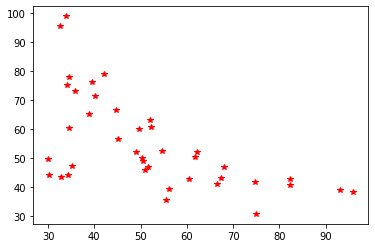

In [32]:
pyplot.plot(x[y==0, 0], x[y==0, 1], 'r*')

In [71]:
def plotData(x, y):
    pos = y==1
    neg = y==0
    pyplot.plot(x[pos, 0], x[pos, 1], 'r*', ms=10, mfc='g', mec='k', mew=1, lw=2)
    pyplot.plot(x[neg, 0], x[neg, 1], 'ro', ms=8,  mfc='r', mec='k', mew=1)
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel('Exam 2 score')
    pyplot.legend(['Admitted', 'Not admitted'])
    fig = pyplot.figure()

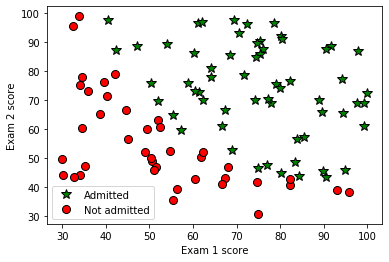

<Figure size 432x288 with 0 Axes>

In [72]:
plotData(x, y)
pass

### Sigmoid Function ==================================

In [77]:
def sigmoid(z):
    import math
    e = math.e
    g = 1/(1+pow(e,-z))
    return g

In [78]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


### Cost Function  =========================
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

### Gradient Function ======================
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [82]:
m, n = x.shape

# Add intercept term to X
x = np.concatenate([np.ones((m, 1)), x], axis=1)

In [143]:
def costFunction(theta, x, y):
    J = 0
    h = np.dot(x,theta)
    g = sigmoid(h)
    J = (((-y)*np.log(g) - (1-y)*np.log(1-g)).sum())/m
    
    grade = theta.copy()
    grade[0] = (((g-y)*x[:, 0]).sum())/m
    grade[1] = (((g-y)*x[:, 1]).sum())/m
    grade[2] = (((g-y)*x[:, 2]).sum())/m
    
    return J, grade

In [145]:
theta = np.array([0.0, 0.0, 0.0])
J, grade = costFunction(theta, x, y)
grade

array([ -0.1       , -12.00921659, -11.26284221])

### Printing the Cost and Gradient values ===========

In [146]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, x, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]



### Testing the Cost and Gradient values ===========

In [147]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, x, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


### Optimizing cost value and theta value =============

In [149]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (x, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


### Ploting the graph =========================

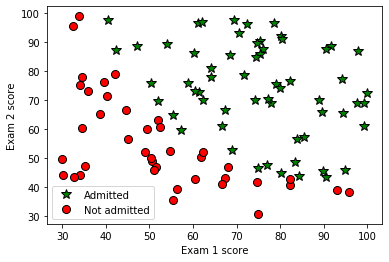

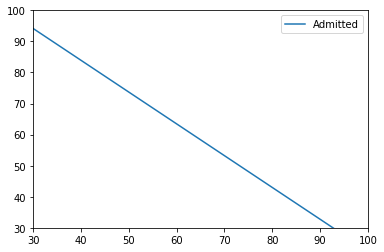

In [150]:
utils.plotDecisionBoundary(plotData, theta, x, y)

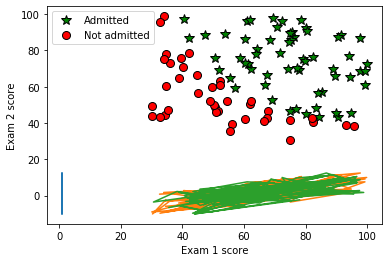

<Figure size 432x288 with 0 Axes>

In [155]:
pos = y==1
neg = y==0
pyplot.plot(x[pos,1],x[pos,2],'r*', ms=10, lw=2, mfc='g', mec='k')
pyplot.plot(x[neg,1],x[neg,2],'ro', ms=8, mew=1, mfc='r', mec='k')
pyplot.plot(x, np.dot(x,theta))
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])
fig = pyplot.figure()